<a href="https://colab.research.google.com/github/Rwolste/DS-3001-Assignments/blob/main/Visualization_and_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Q0)

1)

Machine learning models are broadly classified into two types: regression and classification. Each serves a unique purpose in predictive analytics. Regression models are used to predict continuous numerical values, such as housing prices or stock market trends. These models find patterns in data and generate a best-fit function to estimate outcomes. On the other hand, classification models predict categorical labels, such as determining whether an email is spam or not. Unlike regression, classification assigns inputs to discrete groups.

2)

To evaluate a classification model’s effectiveness, we use a confusion matrix (or confusion table). This matrix compares actual vs. predicted classifications and includes four key elements: True Positives (TP) (correctly predicted positive instances), True Negatives (TN) (correctly predicted negative instances), False Positives (FP) (incorrectly predicted positives), and False Negatives (FN) (incorrectly predicted negatives). From these values, we calculate important performance metrics like accuracy, precision, recall, and F1-score. These measures help determine whether a model performs well and whether it is more prone to false positives or false negatives—critical insights in fields like medical diagnosis or fraud detection.

3)

For regression models, a key performance metric is the Sum of Squared Errors (SSE). SSE quantifies the total squared difference between actual and predicted values. A lower SSE indicates that the model closely follows the true data pattern, while a higher SSE suggests the model is failing to predict accurately. SSE is essential for understanding the precision of regression models and refining them for better predictive performance.

4)

A common challenge in machine learning is overfitting and underfitting. Overfitting occurs when a model learns the training data too well, including noise and anomalies, making it perform poorly on new data. The model is too complex and fails to generalize. Underfitting, in contrast, happens when the model is too simplistic and cannot capture the underlying pattern of the data, leading to poor performance on both training and test data. The goal is to strike a balance, ensuring the model is neither too complex nor too simple.

5)

One way to combat overfitting and underfitting is by splitting data into training and test sets. The training set allows the model to learn patterns, while the test set evaluates how well it generalizes. This prevents the model from merely memorizing data and helps select the best model by assessing accuracy (for classification) or SSE (for regression) on the test data. The test set serves as an independent check to measure true predictive performance, ensuring the model remains reliable when applied to real-world situations.

6)

In classification, predictions can be reported as a class label or as a probability distribution over class labels. A class label provides a direct answer, which is easy to interpret and implement. However, it does not account for uncertainty in predictions. In contrast, probability distributions offer insight into the model’s confidence levels. For example, if a model predicts "spam" with 95% confidence and "not spam" with 5%, the probability distribution allows for nuanced decision-making. While probability outputs provide valuable information, they require interpretation and threshold setting, which can introduce complexity.

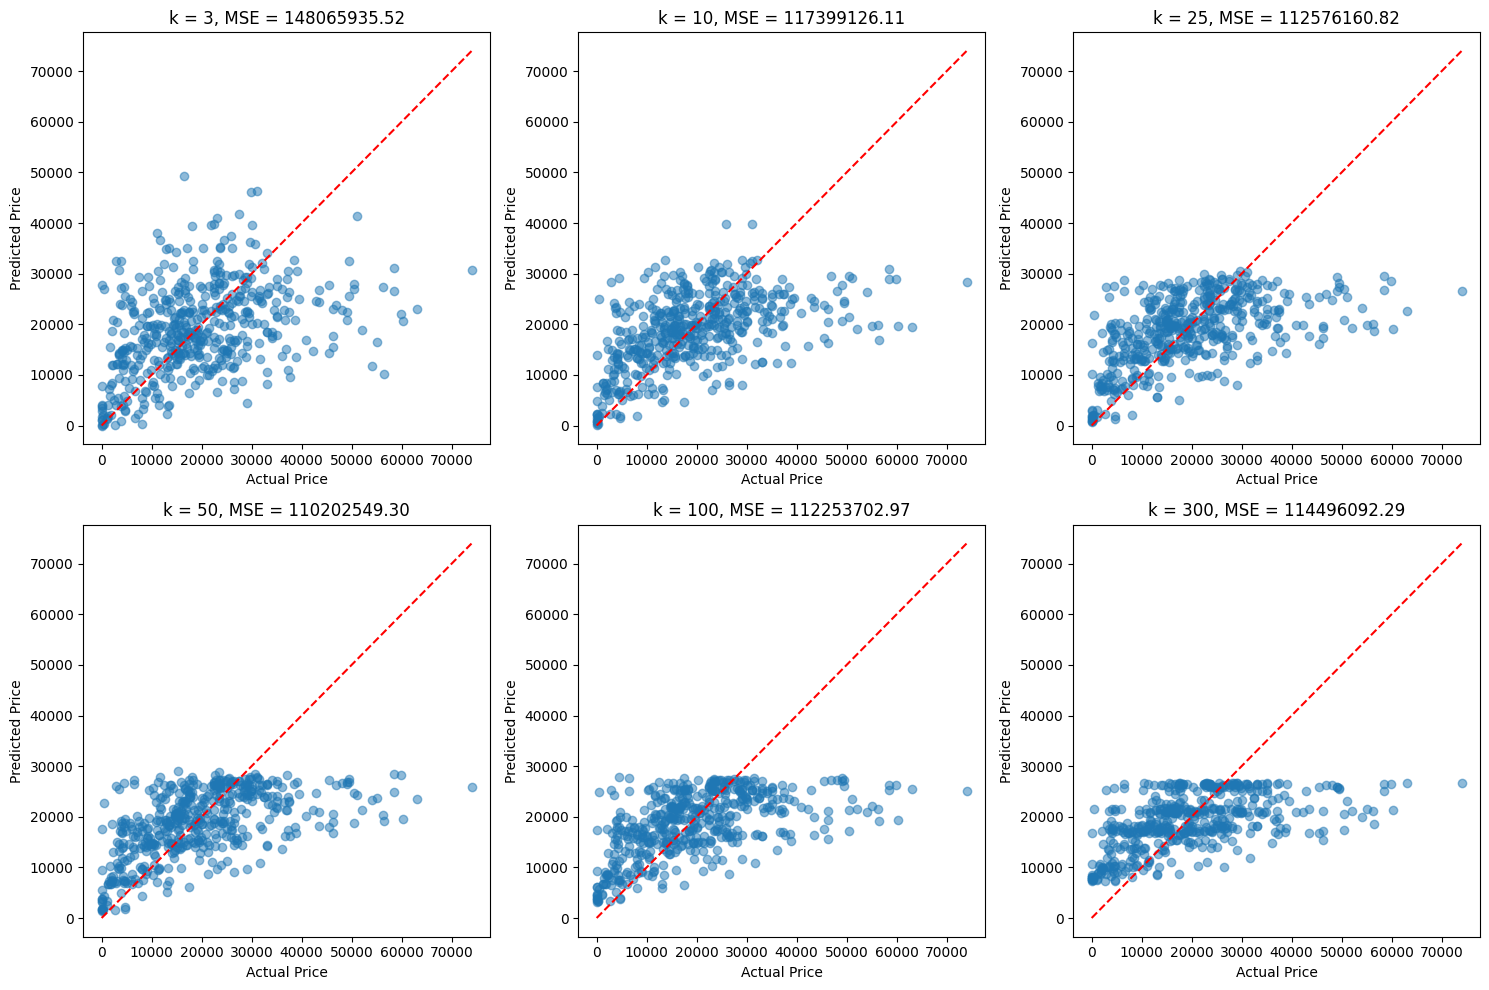

Mean Squared Errors for different k values:
k = 3: MSE = 148065935.52
k = 10: MSE = 117399126.11
k = 25: MSE = 112576160.82
k = 50: MSE = 110202549.30
k = 100: MSE = 112253702.97
k = 300: MSE = 114496092.29


In [4]:
# Q1

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Load the dataset
file_path = "USA_cars_datasets.csv"  # Update path if necessary
df = pd.read_csv(file_path)

# Keep only relevant variables: price, year, mileage
df = df[['price', 'year', 'mileage']]

# Check for missing values
if df.isna().sum().sum() > 0:
    df = df.dropna()  # Drop rows with missing values if any

# Normalize 'year' and 'mileage' using Min-Max Scaling
scaler = MinMaxScaler()
df[['year', 'mileage']] = scaler.fit_transform(df[['year', 'mileage']])

# Define features and target variable
X = df[['year', 'mileage']]
y = df['price']

# Split data into 80% training and 20% test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# List of k values to test
k_values = [3, 10, 25, 50, 100, 300]

# Dictionary to store MSE values
mse_results = {}

# Plot setup
plt.figure(figsize=(15, 10))

for i, k in enumerate(k_values):
    # Train kNN model
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)

    # Predict on test set
    y_pred = knn.predict(X_test)

    # Compute Mean Squared Error
    mse = mean_squared_error(y_test, y_pred)
    mse_results[k] = mse

    # Plot actual vs predicted values
    plt.subplot(2, 3, i + 1)
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='dashed')  # Perfect prediction line
    plt.xlabel("Actual Price")
    plt.ylabel("Predicted Price")
    plt.title(f"k = {k}, MSE = {mse:.2f}")

# Show the plots
plt.tight_layout()
plt.show()

# Display MSE results
print("Mean Squared Errors for different k values:")
for k, mse in mse_results.items():
    print(f"k = {k}: MSE = {mse:.2f}")


As K increases the MSE decreases meaning the model better fits the data. However at k = 100 the mean squared error begins to increase again meaning underfitting.

The optimal k is 50 since it has the lowest MSE

As
𝑘
k varies in k-Nearest Neighbors regression, the model's performance shifts between overfitting and underfitting. With small
𝑘
k (e.g., 3, 10), the model is highly sensitive to local variations, leading to overfitting, where predictions fluctuate widely and capture noise rather than true patterns. The scatterplots show a large spread of points, indicating high variance. As
𝑘
k increases to 50 (optimal choice), the model strikes a balance between bias and variance, producing more stable predictions closely aligned with actual prices. The scatterplot shows a tighter clustering around the perfect prediction line, and Mean Squared Error (MSE) is minimized. However, for large
𝑘
k (e.g., 100, 300), the model becomes too smooth, losing sensitivity to real data patterns and averaging predictions excessively, resulting in underfitting. The scatterplots for these cases show a narrow trend line with systematic errors. Choosing an optimal
𝑘
k avoids both overfitting and underfitting, ensuring the best predictive performance.

Dataset Dimensions: (3466, 4)
    level  aid_value                 control  grad_100_value
0  4-year     7142.0                  Public            10.0
1  4-year     6088.0                  Public            29.4
2  4-year     2540.0  Private not-for-profit             0.0
3  4-year     6647.0                  Public            16.5
4  4-year     7256.0                  Public             8.8

Cross-tabulation of Control and Level:
 level                   2-year  4-year
control                               
Private for-profit         460     318
Private not-for-profit      68    1121
Public                     926     573

Descriptive Statistics for Graduation Rate:
 count    3466.000000
mean       28.353347
std        23.306899
min         0.000000
25%         9.000000
50%        22.500000
75%        43.600000
max       100.000000
Name: grad_100_value, dtype: float64


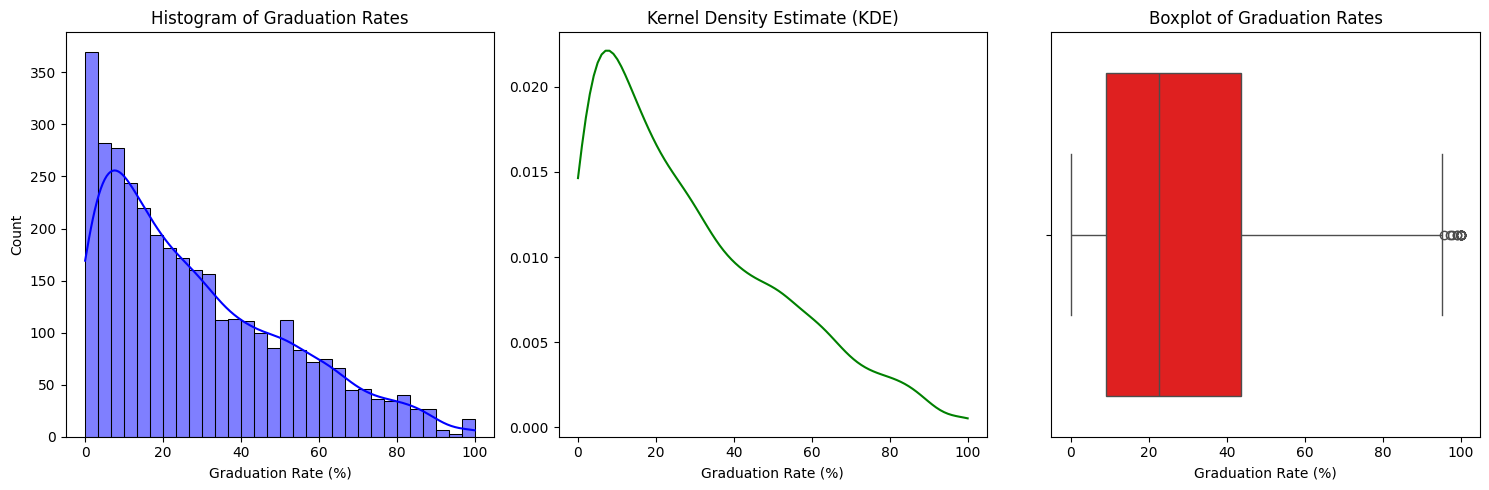

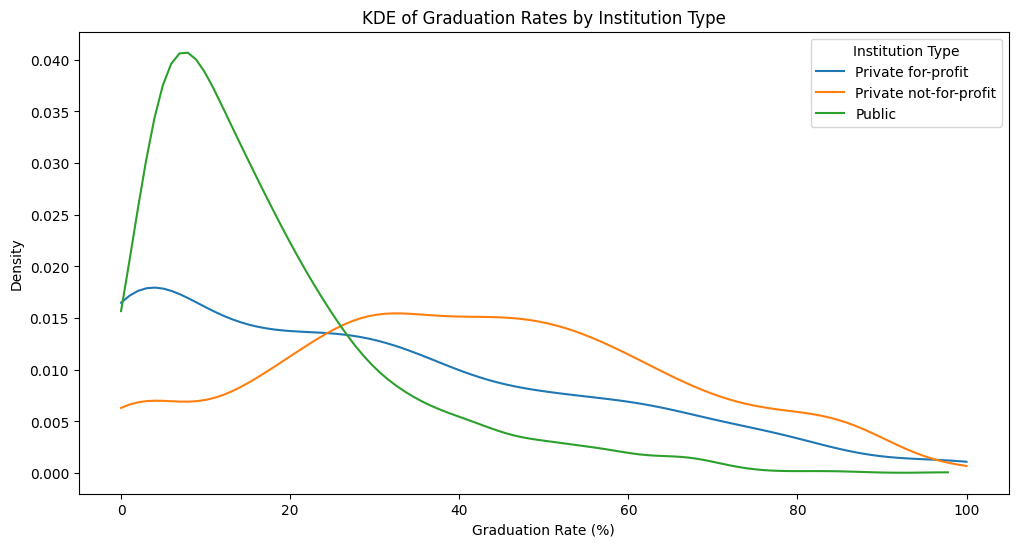

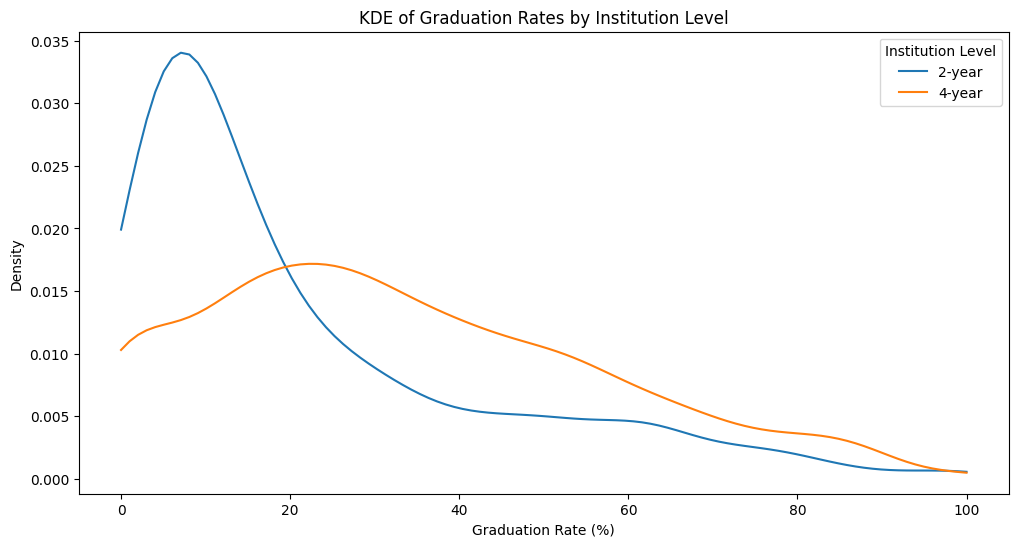

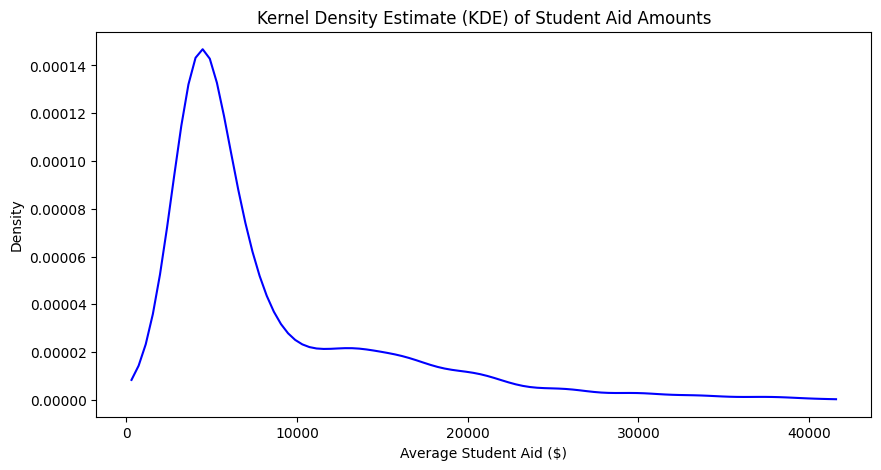

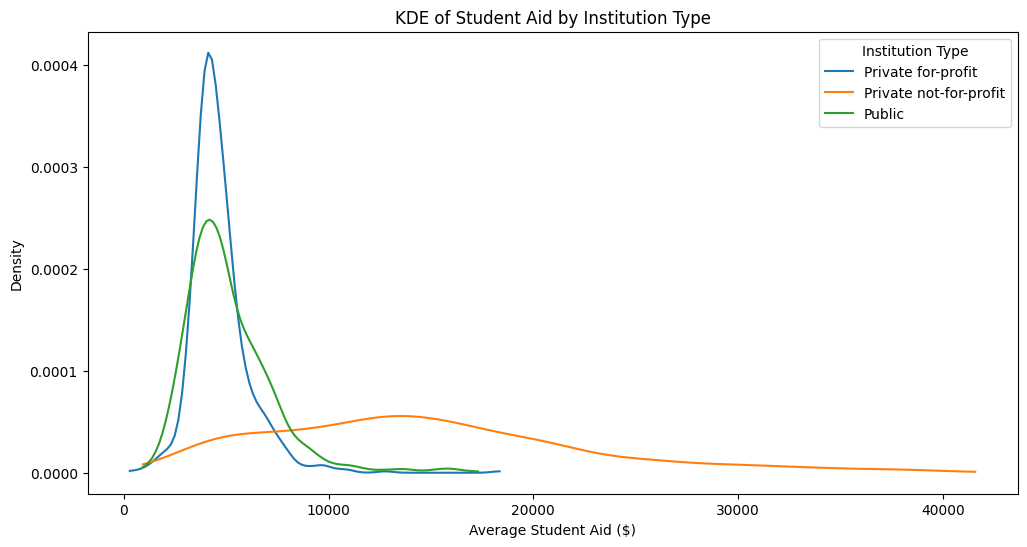

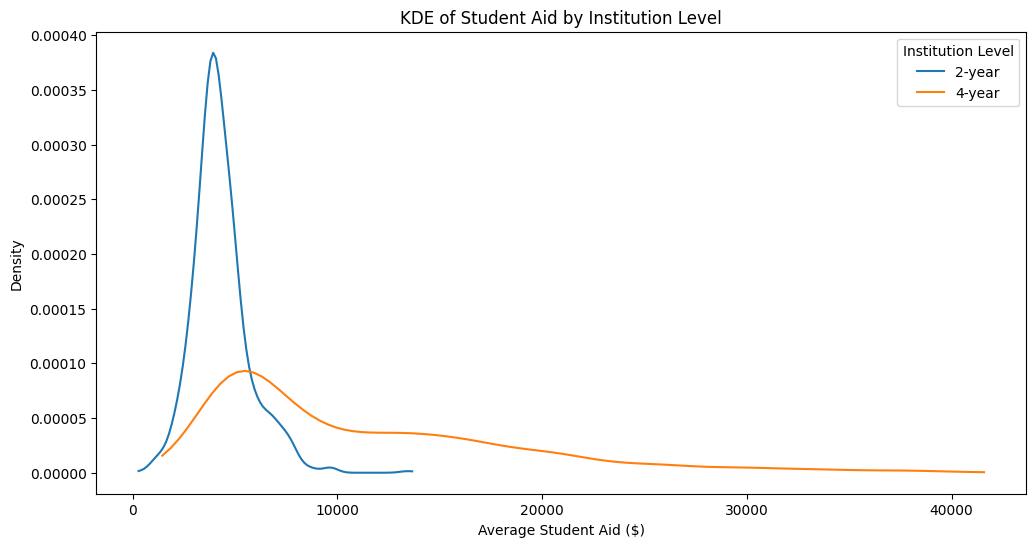

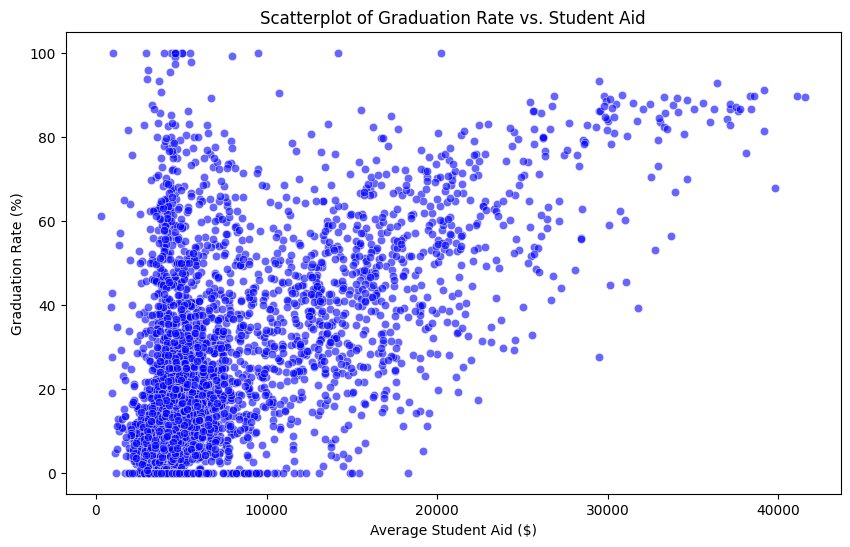

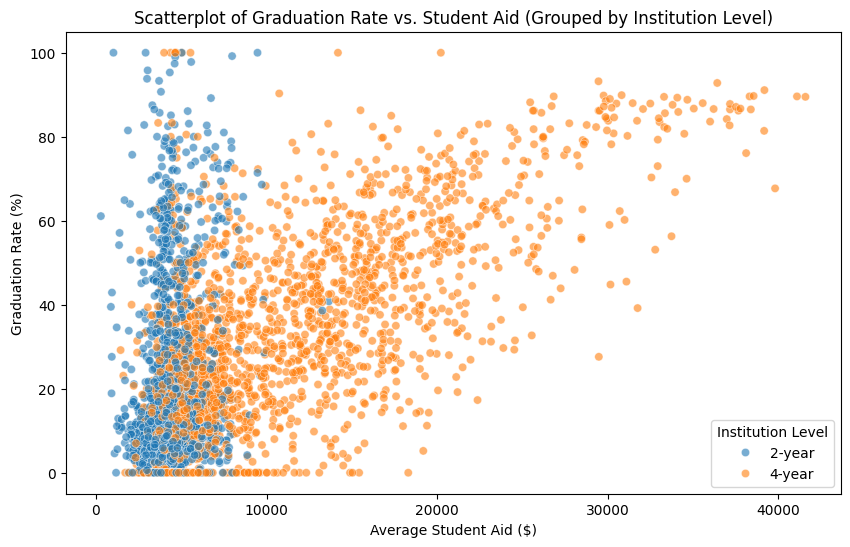

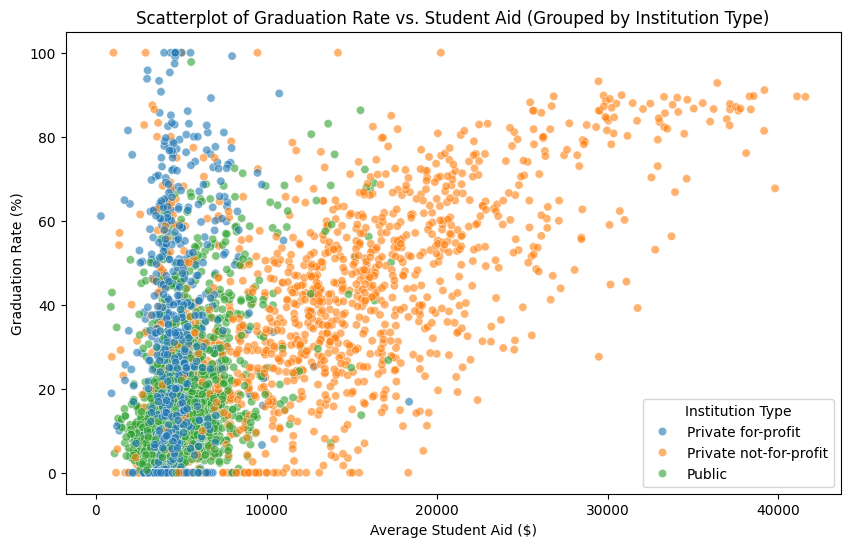

In [8]:
#Q1

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde

# Load the dataset
file_path = "college_completion.csv"  # Update the file path if needed
df = pd.read_csv(file_path)

# Keep only the relevant columns
df = df[['level', 'aid_value', 'control', 'grad_100_value']]

# Check for missing values and drop them
df = df.dropna()

# Convert categorical variables to category dtype
df['control'] = df['control'].astype('category')
df['level'] = df['level'].astype('category')

# Ensure grad_100_value and aid_value are numeric
df['grad_100_value'] = pd.to_numeric(df['grad_100_value'], errors='coerce')
df['aid_value'] = pd.to_numeric(df['aid_value'], errors='coerce')

# Drop remaining NaNs if any
df = df.dropna()

# Display dimensions and first few rows
print("Dataset Dimensions:", df.shape)
print(df.head())

# Cross-tabulation of control and level
cross_tab = pd.crosstab(df['control'], df['level'])
print("\nCross-tabulation of Control and Level:\n", cross_tab)

# Descriptive Statistics for grad_100_value
grad_stats = df['grad_100_value'].describe()
print("\nDescriptive Statistics for Graduation Rate:\n", grad_stats)

# Visualizing Graduation Rate
plt.figure(figsize=(15, 5))

# Histogram
plt.subplot(1, 3, 1)
sns.histplot(df['grad_100_value'], bins=30, kde=True, color='blue')
plt.xlabel('Graduation Rate (%)')
plt.title('Histogram of Graduation Rates')

# Kernel Density Plot using Matplotlib
plt.subplot(1, 3, 2)
kde = gaussian_kde(df['grad_100_value'])
x_range = np.linspace(df['grad_100_value'].min(), df['grad_100_value'].max(), 100)
plt.plot(x_range, kde(x_range), color='green')
plt.xlabel('Graduation Rate (%)')
plt.title('Kernel Density Estimate (KDE)')

# Boxplot
plt.subplot(1, 3, 3)
sns.boxplot(x=df['grad_100_value'], color='red')
plt.xlabel('Graduation Rate (%)')
plt.title('Boxplot of Graduation Rates')

plt.tight_layout()
plt.show()

# KDE Plot of Graduation Rate by Institution Type (Control)
plt.figure(figsize=(12, 6))
for category in df['control'].cat.categories:
    subset = df[df['control'] == category]['grad_100_value']
    kde = gaussian_kde(subset)
    x_range = np.linspace(subset.min(), subset.max(), 100)
    plt.plot(x_range, kde(x_range), label=category)

plt.xlabel('Graduation Rate (%)')
plt.ylabel('Density')
plt.title('KDE of Graduation Rates by Institution Type')
plt.legend(title='Institution Type')
plt.show()

# KDE Plot of Graduation Rate by Institution Level (2-year vs. 4-year)
plt.figure(figsize=(12, 6))
for category in df['level'].cat.categories:
    subset = df[df['level'] == category]['grad_100_value']
    kde = gaussian_kde(subset)
    x_range = np.linspace(subset.min(), subset.max(), 100)
    plt.plot(x_range, kde(x_range), label=category)

plt.xlabel('Graduation Rate (%)')
plt.ylabel('Density')
plt.title('KDE of Graduation Rates by Institution Level')
plt.legend(title='Institution Level')
plt.show()

# Visualizing Student Aid (aid_value)
plt.figure(figsize=(10, 5))
kde = gaussian_kde(df['aid_value'])
x_range = np.linspace(df['aid_value'].min(), df['aid_value'].max(), 100)
plt.plot(x_range, kde(x_range), color='blue')
plt.xlabel('Average Student Aid ($)')
plt.ylabel('Density')
plt.title('Kernel Density Estimate (KDE) of Student Aid Amounts')
plt.show()

# KDE Plot of Student Aid by Institution Type (Control)
plt.figure(figsize=(12, 6))
for category in df['control'].cat.categories:
    subset = df[df['control'] == category]['aid_value']
    kde = gaussian_kde(subset)
    x_range = np.linspace(subset.min(), subset.max(), 100)
    plt.plot(x_range, kde(x_range), label=category)

plt.xlabel('Average Student Aid ($)')
plt.ylabel('Density')
plt.title('KDE of Student Aid by Institution Type')
plt.legend(title='Institution Type')
plt.show()

# KDE Plot of Student Aid by Institution Level
plt.figure(figsize=(12, 6))
for category in df['level'].cat.categories:
    subset = df[df['level'] == category]['aid_value']
    kde = gaussian_kde(subset)
    x_range = np.linspace(subset.min(), subset.max(), 100)
    plt.plot(x_range, kde(x_range), label=category)

plt.xlabel('Average Student Aid ($)')
plt.ylabel('Density')
plt.title('KDE of Student Aid by Institution Level')
plt.legend(title='Institution Level')
plt.show()

# Scatterplot of Graduation Rate vs. Student Aid
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['aid_value'], y=df['grad_100_value'], alpha=0.6, color='blue')
plt.xlabel('Average Student Aid ($)')
plt.ylabel('Graduation Rate (%)')
plt.title('Scatterplot of Graduation Rate vs. Student Aid')
plt.show()

# Scatterplot grouped by Institution Level
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='aid_value', y='grad_100_value', hue='level', alpha=0.6)
plt.xlabel('Average Student Aid ($)')
plt.ylabel('Graduation Rate (%)')
plt.title('Scatterplot of Graduation Rate vs. Student Aid (Grouped by Institution Level)')
plt.legend(title='Institution Level')
plt.show()

# Scatterplot grouped by Institution Type (Control)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='aid_value', y='grad_100_value', hue='control', alpha=0.6)
plt.xlabel('Average Student Aid ($)')
plt.ylabel('Graduation Rate (%)')
plt.title('Scatterplot of Graduation Rate vs. Student Aid (Grouped by Institution Type)')
plt.legend(title='Institution Type')
plt.show()


2) The dataset contains 3,798 observations (rows) and 63 variables (columns). The relevant variables are level, aid_value, control, and grad_100_value.

3) Public institutions dominate the 2-year category, making up the largest portion. Private not-for-profit institutions are mostly 4-year schools. Private for-profit institutions are relatively evenly split between 2-year (465) and 4-year (527) programs.

5 and 6) Private not for profit institutions have the highest graduation rates for both 2 and 4 year.

8) Private not for profit financial aid increases graduation rate the most.

